# Experiment log
Collect experiments.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.tree
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import colorsys
import json

In [2]:
presentation_mode = True
if presentation_mode:
    import warnings
    warnings.filterwarnings('ignore')
    mpl.rcParams.update({'font.size': 25})
    mpl.rcParams.update({'axes.labelsize': 25})
    mpl.rcParams.update({'text.usetex': False})

## Experiment 1
Orange/brown circle on grey background.

### 1.1.1
This is the first run of the experiment.

#### Setup
Daylight, with poor environment controls. 
![experiment 1.1.1 setup](resources/experiment_1_1_1.jpg)

#### Data
Data isn't fully serialized.

In [3]:
data = pd.read_csv('../data/experiment_1_1_1.csv')

The data looks like:

|  Answer  |  Circle Color    |  Background Color      |
| -------- | ---------------- | ---------------------- |
|  0  |  \[0.81, 0.75, 0.28\]   |  \[0.25, 0.25, 0.25\]  |
|  3  |  \[0.12, 0.15, 0.34\]   |  \[0.50, 0.50, 0.50\]     |
|  1  |  \[0.54, 0.23, 0.10\]  |  \[0.91, 0.91, 0.91\]  |
|  2  |  \[0.84, 0.19, 0.29\]   |  \[0.85, 0.85, 0.85\]  |
|  1  |  \[0.87, 0.34, 0.20\]   |  \[0.94, 0.94, 0.94\]  |
|  0  |  \[0.43, 0.43, 0.72\]  |  \[0.31, 0.31, 0.31\]  |

Where elements in the "Answer" represent my choice as follows:

| Answer | Meaning |
| ------ | --------|
| 0| orange   |
|1| brown  |
|2| both  |
|3| neither|  

The following shows the first few rows of the actual data:

In [4]:
# Preview
data[0:5]

,ans,circle_rgb,bg_rgb
0,3,"[1, 0, 0]","[0, 0, 0]"
1,3,"[0.24683667776828655, 0.21342619773353233, 0.2...","[0.9779460401490853, 0.9779460401490853, 0.977..."
2,3,"[0.113287755739501, 0.10473311081971061, 0.045...","[0.8183080537325035, 0.8183080537325035, 0.818..."
3,0,"[0.9795646896652704, 0.42022575630354925, 0.07...","[0.6902299453895665, 0.6902299453895665, 0.690..."
4,3,"[0.5693562687365206, 0.50516730506264, 0.18505...","[0.5103616563179266, 0.5103616563179266, 0.510..."


#### Circle and background color generation function
The first screen was red against black. What follows was a random selection of circle color and background color, with the conditions:

* The background colors are random colors between \[0, 0, 0\] and \[1, 1, 1\], with all elements kept equal. 
* The circle colors are chosen in HSV color space (Hue-Saturation-Value), where hue can vary between between 0.04-0.177, and saturation and value are randomly chosen between 0-1.

The following is the two functions used to create the colors:

In [5]:
HUE_RANGE = [0.04, 0.177]

def next_circle_rgb():
    hsv = [random.uniform(*HUE_RANGE), 
            random.random(),
            random.random()]
    rgb = colorsys.hsv_to_rgb(*hsv)
    return rgb


def next_bg_rgb():
    grey = random.random()
    return [grey, grey, grey]

Below, we flatten the color vectors (making each element a column). This is done as scikit-learn doesn't really work well when matrix elements are vectors.

In [6]:
# Serialize the data, to make using it with scikit-learn easier.
data_serial = pd.concat([pd.DataFrame([
    [row['ans'], *json.loads(row['circle_rgb']), *json.loads(row['bg_rgb'])]],
    columns=['ans', 'circle R', 'circle G', 'circle B', 'bg R', 'bg G', 'bg B'])
 for idx, row in data.iterrows()])
data_serial.head()

,ans,circle R,circle G,circle B,bg R,bg G,bg B
0,3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,3,0.246837,0.213426,0.200337,0.977946,0.977946,0.977946
0,3,0.113288,0.104733,0.045887,0.818308,0.818308,0.818308
0,0,0.979565,0.420226,0.071191,0.690230,0.690230,0.690230
0,3,0.569356,0.505167,0.185052,0.510362,0.510362,0.510362


The below table shows the data types of each column. 

In [7]:
data_serial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ans       219 non-null    int64  
 1   circle R  219 non-null    float64
 2   circle G  219 non-null    float64
 3   circle B  219 non-null    float64
 4   bg R      219 non-null    float64
 5   bg G      219 non-null    float64
 6   bg B      219 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.7 KB


This next table shows some statistics. Nothing really interesting to see here.

In [20]:
data_serial.describe()

,ans,circle R,circle G,circle B,bg R,bg G,bg B
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2.187215,0.522146,0.429388,0.262934,0.480307,0.480307,0.480307
std,1.221603,0.298772,0.267896,0.224879,0.285525,0.285525,0.285525
min,0.000000,0.001364,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.239660,0.197149,0.078438,0.221313,0.221313,0.221313
50%,3.000000,0.556740,0.410000,0.193327,0.512345,0.512345,0.512345
75%,3.000000,0.794788,0.657776,0.394948,0.718214,0.718214,0.718214
max,3.000000,1.000000,0.973452,0.952337,0.983227,0.983227,0.983227


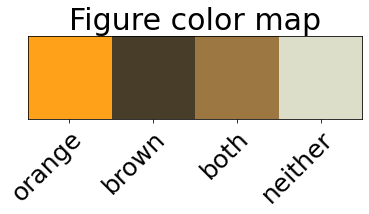

In [16]:
# Figure colors
orange_marker_color = '#ffa219'
brown_marker_color = '#473d28'
both_marker_color = '#9c7741'
neither_marker_color = '#dddec9'
# orange, brown, both, neither
plot_colors = [orange_marker_color, brown_marker_color, both_marker_color, neither_marker_color]
color_list = [plot_colors[i] for i in data_serial.loc[:,'ans']]

colors_as_vec = [mpl.colors.to_rgb(c) for c in plot_colors ]
fig, ax = plt.subplots()
img = ax.imshow(np.array([colors_as_vec]))
# plt.gca().set_xticklabels(['a', 'b', 'c', 'd'])
ax.set_xticklabels(['', 'orange', 'brown', 'both', 'neither'])
ax.get_yaxis().set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");
ax.set_title("Figure color map");

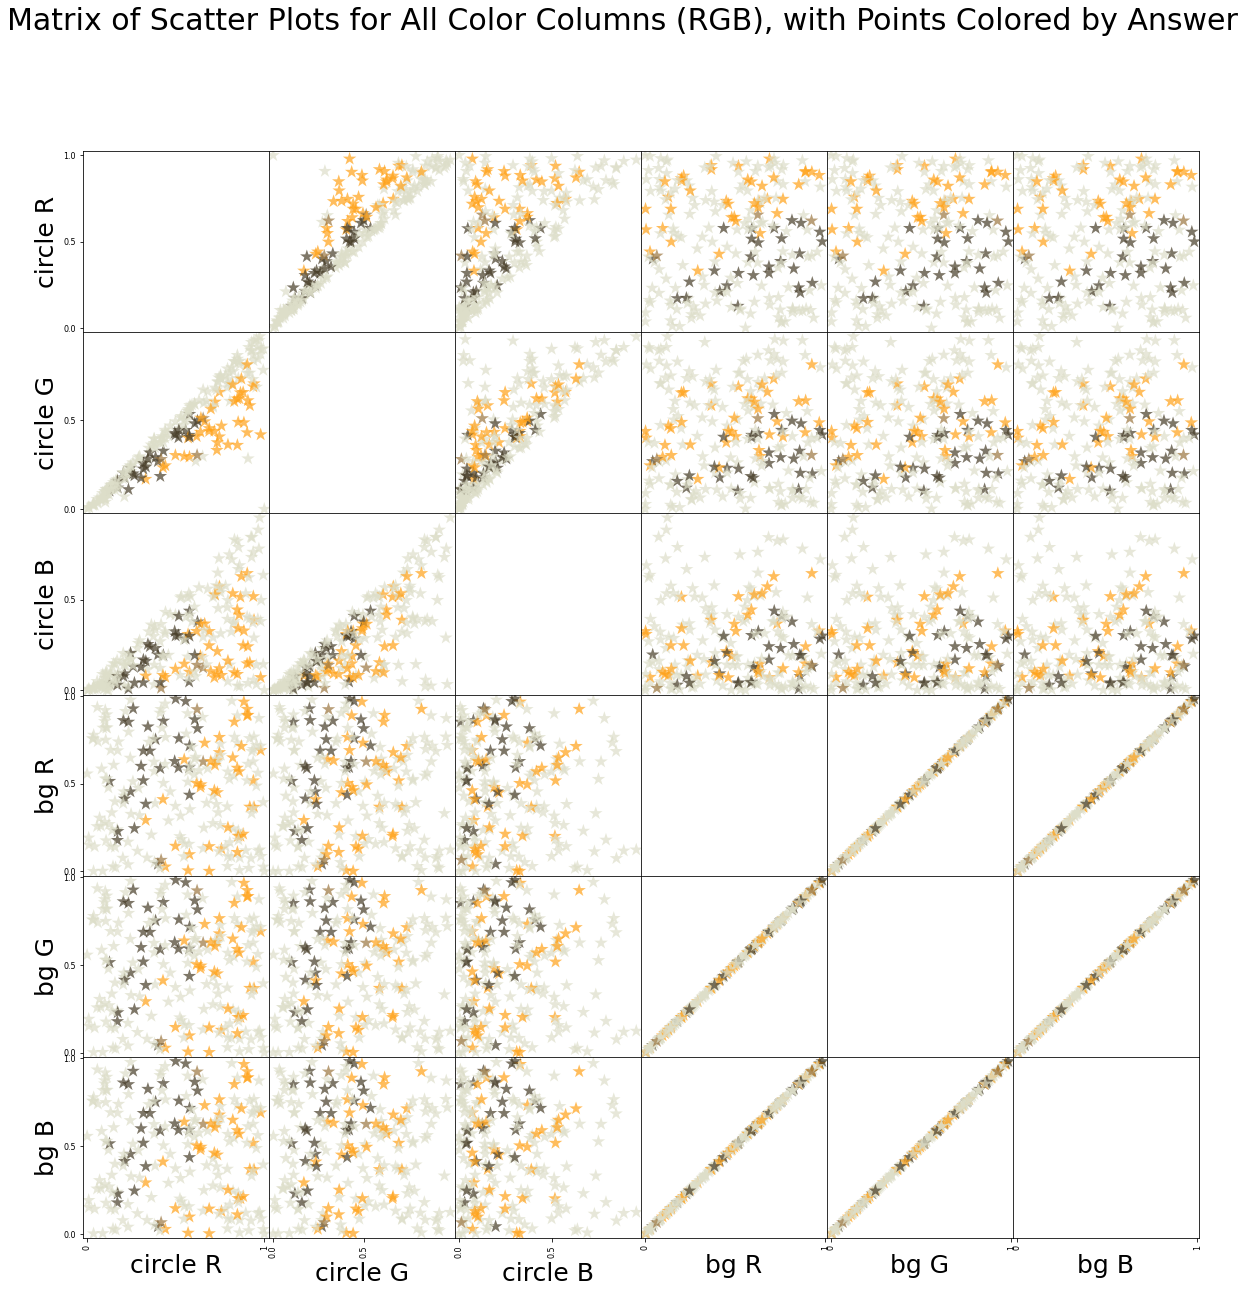

In [17]:
ax1 = pd.plotting.scatter_matrix(data_serial.loc[:, data_serial.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
ax1[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
plt.suptitle('Matrix of Scatter Plots for All Color Columns (RGB), with Points Colored by Answer');
#plt.tight_layout()

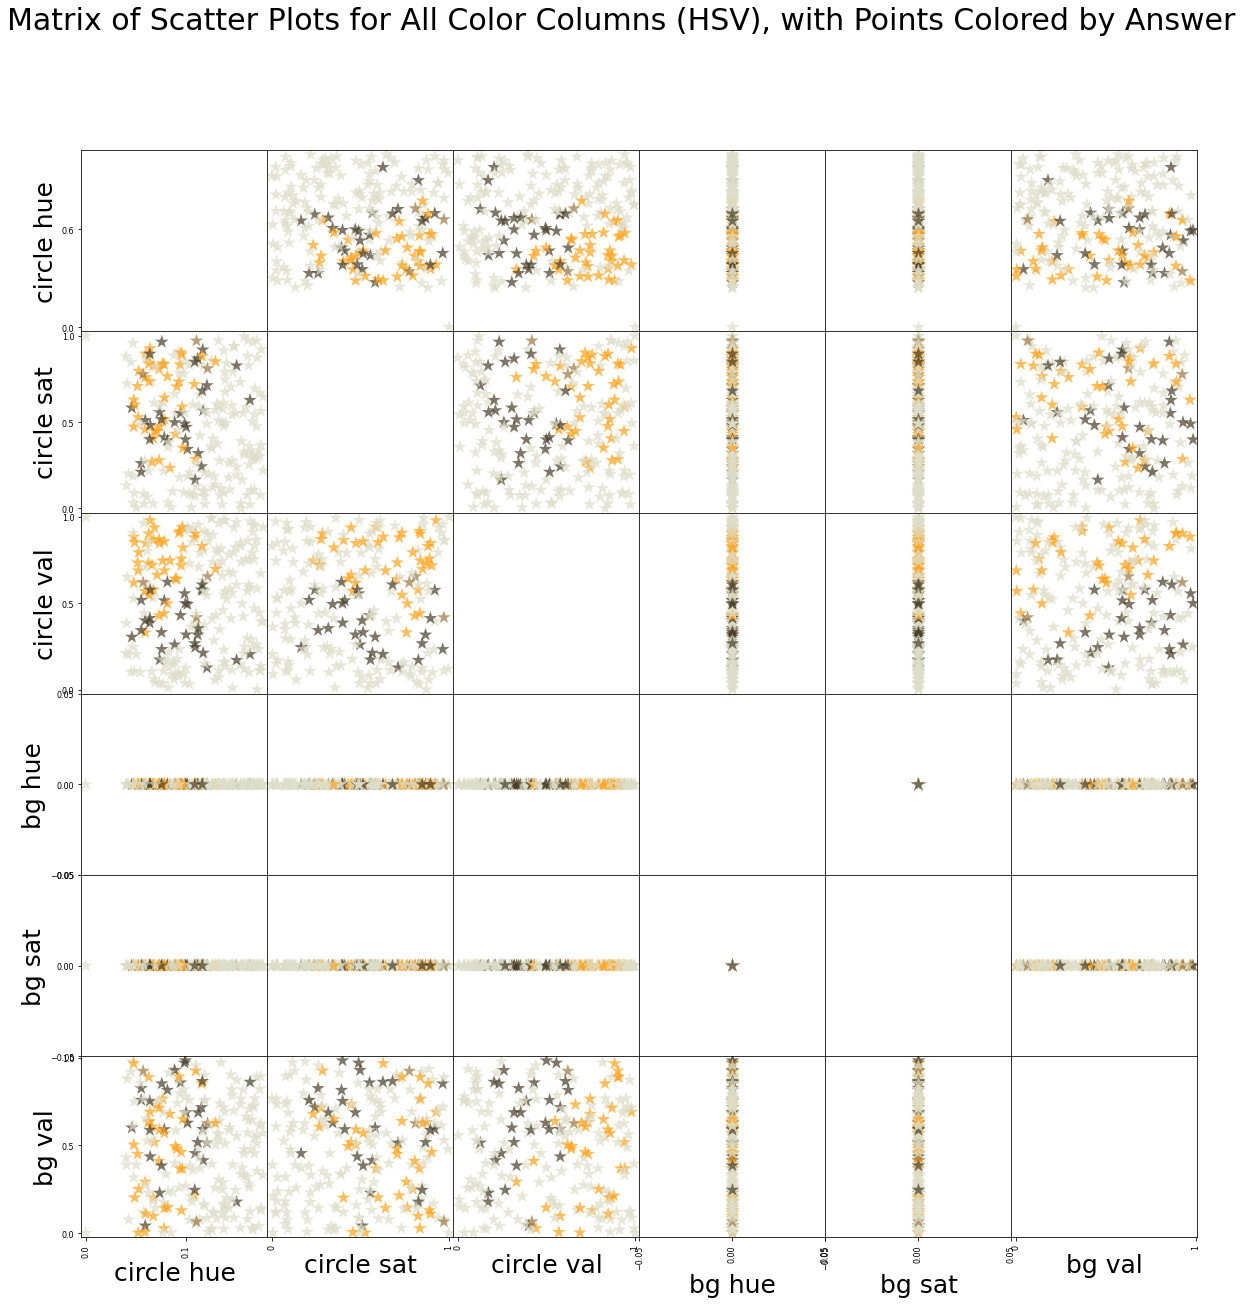

In [18]:
data_serial_hsv = pd.concat([pd.DataFrame([
    [row['ans'], *colorsys.rgb_to_hsv(*json.loads(row['circle_rgb'])), *colorsys.rgb_to_hsv(*json.loads(row['bg_rgb']))]],
    columns=['ans', 'circle hue', 'circle sat', 'circle val', 'bg hue', 'bg sat', 'bg val'])
 for idx, row in data.iterrows()])
ax2 = pd.plotting.scatter_matrix(data_serial_hsv.loc[:, data_serial_hsv.columns != 'ans'],
                          c=color_list,
                          figsize=[20,20],
                          #diagonal='hist',
                          diagonal=None,
                          alpha=0.7,
                          s=200,
                          marker='*')
plt.suptitle('Matrix of Scatter Plots for All Color Columns (HSV), with Points Colored by Answer');
ax2[0,0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

## Training

In [12]:
X = data_serial.iloc[:,1:]
y = data_serial.iloc[:,0]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.25)

clf = sk.tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
clf.score(X_test, y_test)

0.7090909090909091

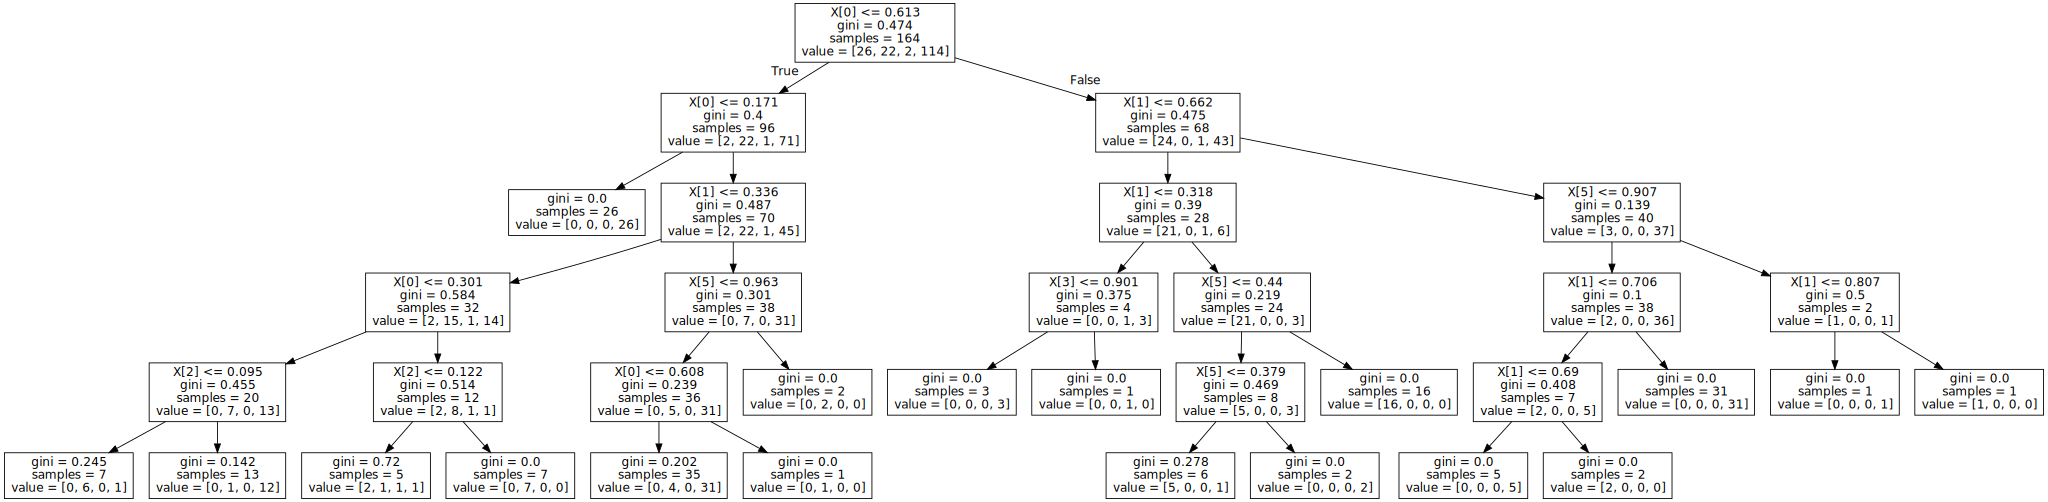

In [13]:
tree = sk.tree.export_graphviz(clf)
graph = graphviz.Source(tree)
graph.render("tree")
graph

In [14]:
X = data_serial_hsv.iloc[:,1:]
y = data_serial_hsv.iloc[:,0]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.25)

clf = sk.tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
#prediction = clf.predict(X_test)
clf.score(X_test, y_test)

0.7818181818181819

Note how in the below tree, X = [circle_hue, circle_saturation, circle_value, bg_hue, bg_saturation, bg_value], and X[2] and X[5] are being used to make decisions.

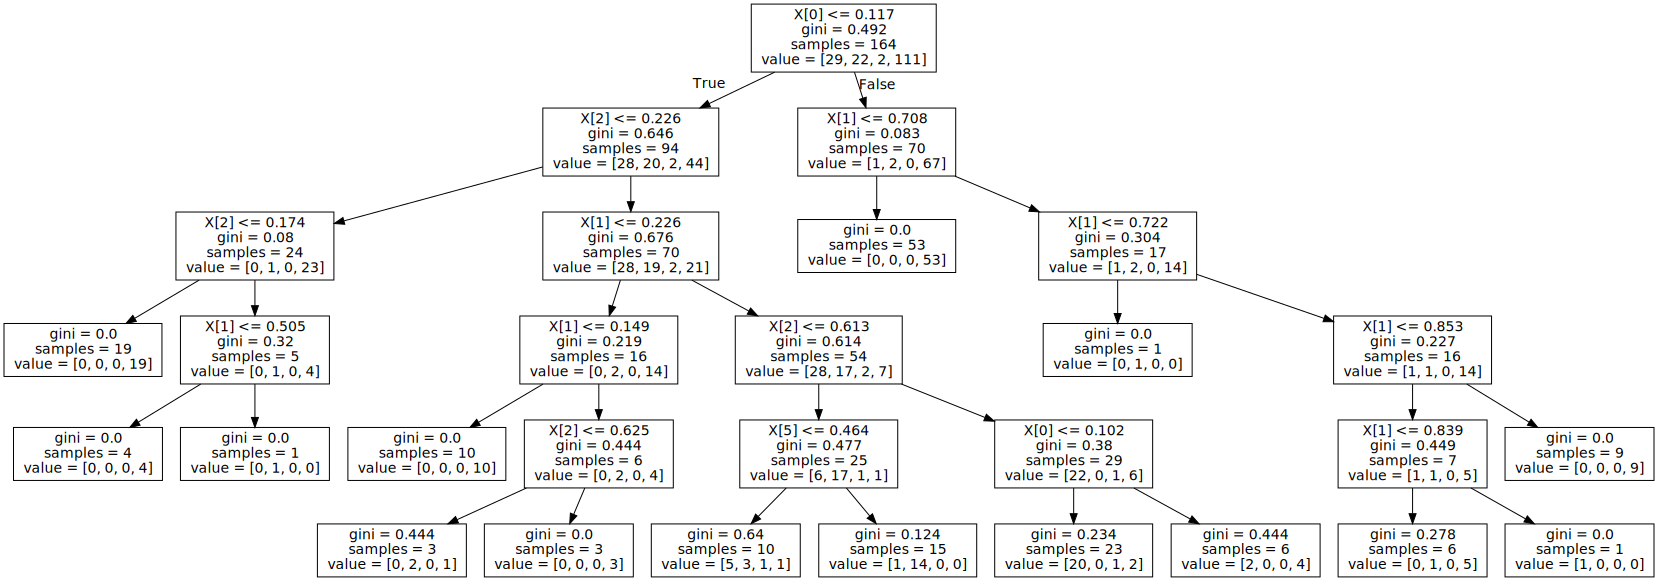

In [15]:
tree = sk.tree.export_graphviz(clf)
graph = graphviz.Source(tree)
graph.render("tree")
graph